<img src="../imgs/xkcd-neural-net.png" width="300">

# Bem vindos !


<img src="../imgs/que-bom.jpg" width="600">

# Lets go !

<img src="https://media.giphy.com/media/cPfjwUZtwArxyHVqjz/giphy.gif" width="500">

# O que vamos aprender hoje?

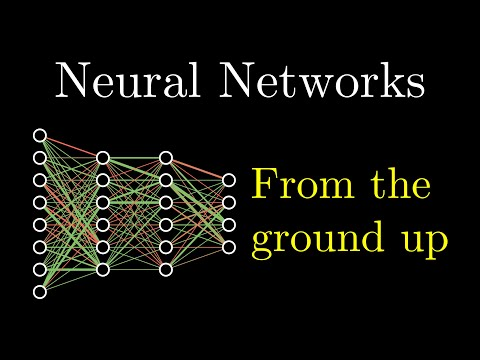

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("aircAruvnKk", start=0, end=334)

**Eu recomendo MUITO que vocês vejam esse vídeo até o final, mas isso vai além do escopo dessa aula**

## Discutam entre vocês o que é uma Rede Neural 


Contem pra mim :)

<img src="https://media.giphy.com/media/mucJbtydzALRvRX5m5/giphy.gif" width="250">

### Aplicações

![title](../imgs/applications-neural-network.jpg)

Entre muitas outras!

### Dados não estruturados

Assim como árvores ganharam muita força em cima de dados estruturados, redes neurais ganharam muito poder com relação a dados não estruturados, como imagens e NLP! Mas não que elas não sejam boas com dados estuturados (No Free Lunch, lembrem-se!), elas só acabam indo tão bem quanto!


- [Exemplo da Evolução que Deep Learning conseguiu proporcionar](https://benchmarks.ai/cifar-10)

# Usando as armas que temos

Primeiro, vamos começar com as armas que a gente tem :)

## O Dataset

O Dataset foi tirado do [Kaggke](https://www.kaggle.com/c/digit-recognizer)


> Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Vamos dar uns 10 minutos para vocês relembrarem do dataset, darem uma explorada e aí a gente discute :)

In [2]:
import sys
sys.path.append('../code_utils/')

import collections
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from plotting import (multiple_histograms_plot, plot_confusion_matrix,
                      plot_roc, predictions_hist)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook

In [3]:
pd.set_option('display.max_colwidth', 140)
sns.set_context("notebook", font_scale=1.5)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 6
df_train = pd.read_csv('../data/train.csv' , delimiter=',')
df_test = pd.read_csv('../data/test.csv' , delimiter=',')
pd.set_option('display.max_colwidth', 500)

In [4]:
display(df_train.head())
display(df_test.head())

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


O desafio de pós aula é vocês subirem os próprios modelos de vocês no Kaggle :)

In [5]:
y_train = df_train.iloc[:,0].astype('int8')
X_train = df_train.iloc[:,1:].astype('float64')

In [6]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

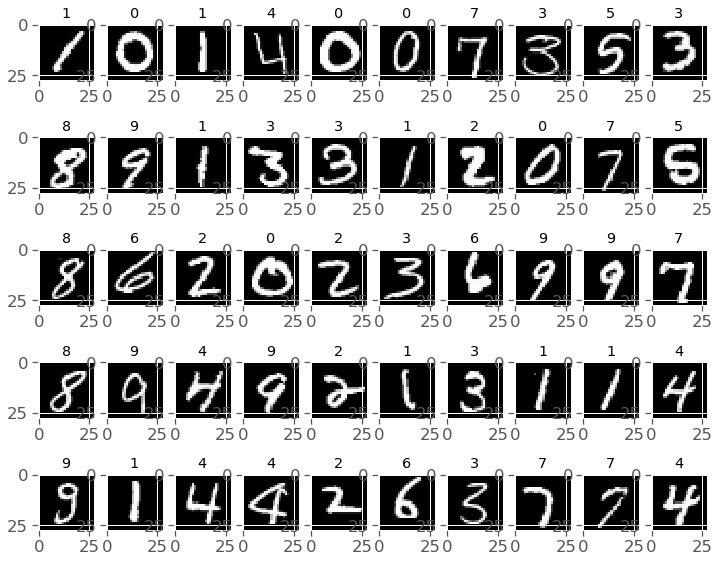

In [7]:
%matplotlib inline
plt.figure(figsize=(12,10))

y, x = 5,10
for i in tqdm_notebook(range(0,(y*x))):
    plt.subplot(y, x, i+1)
    show_image(X_train.values[i],(28,28), y_train.values[i], cmp="gray")
plt.show()

In [8]:
28*28

784

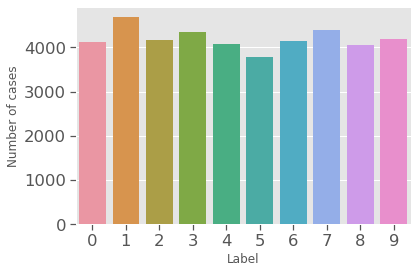

In [9]:
fig = sns.countplot(df_train['label'])
fig.set(xlabel='Label', ylabel='Number of cases')    
plt.show()

###### Dados balanceados, o que é muito bacana :)

# Revisando um pouco


Como primeiro exercício, separem os dados de treinamento em treino (80%) e validação (20%), e treinem uma regressão logística e um lightgb,

Usem random_seed de 42 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=.8, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

/Users/abarbosa/miniconda3/envs/tera-env/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [12]:
model_lr = LogisticRegression(max_iter=1000)
model_lgb = lgb.LGBMClassifier(objective="multiclass")

In [13]:
%%time
model_lr.fit(X_train, y_train)

CPU times: user 6min 32s, sys: 13.8 s, total: 6min 46s
Wall time: 1min 43s


/Users/abarbosa/miniconda3/envs/tera-env/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
%%time
model_lgb.fit(X_train, y_train)

CPU times: user 6min 19s, sys: 11.2 s, total: 6min 30s
Wall time: 55.5 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [15]:
class_names = set(df_train.label)

In [16]:
class_names

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [17]:
from sklearn.metrics import plot_confusion_matrix

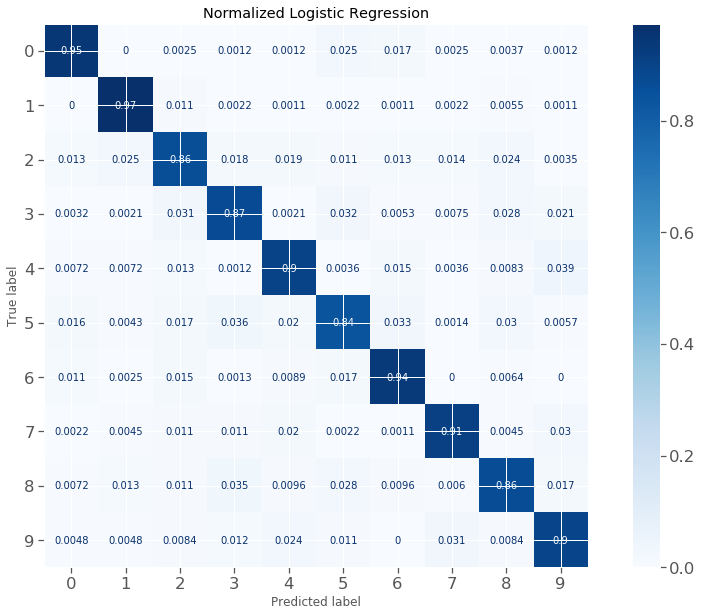

In [18]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.set_title("Normalized Logistic Regression")
disp = plot_confusion_matrix(model_lr, X_val, y_val,
                      display_labels=class_names,
                      cmap=plt.cm.Blues,
                      normalize='true',
                      ax=ax)

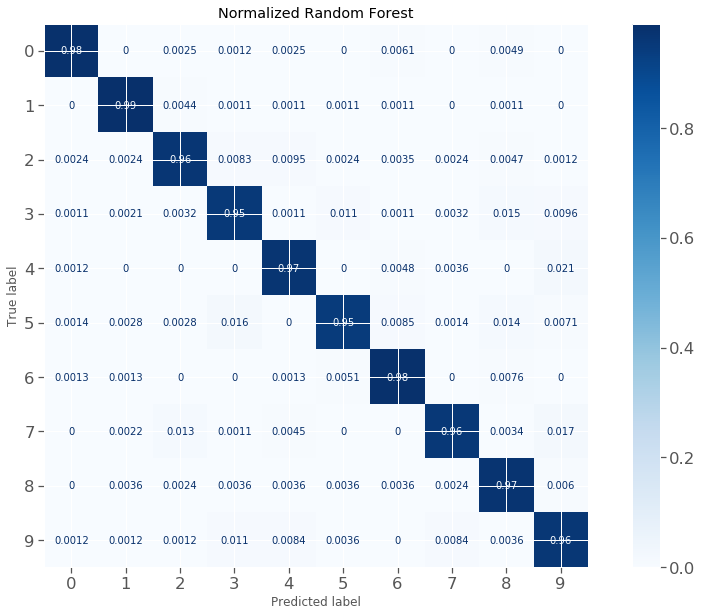

In [19]:
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.set_title("Normalized Random Forest")
disp = plot_confusion_matrix(model_lgb, X_val, y_val,
                      display_labels=class_names,
                      cmap=plt.cm.Blues,
                      normalize='true',
                      ax=ax)

O Lightgbm foi um pouco melhor, mas quanto melhor?


In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_val, model_lr.predict(X_val))

0.9007142857142857

In [65]:
accuracy_score(y_val, model_lgb.predict(X_val))

0.9680952380952381

# Interpretando os resultados


In [23]:
import shap

In [24]:
sample = shap.sample(X_train, random_state=42)

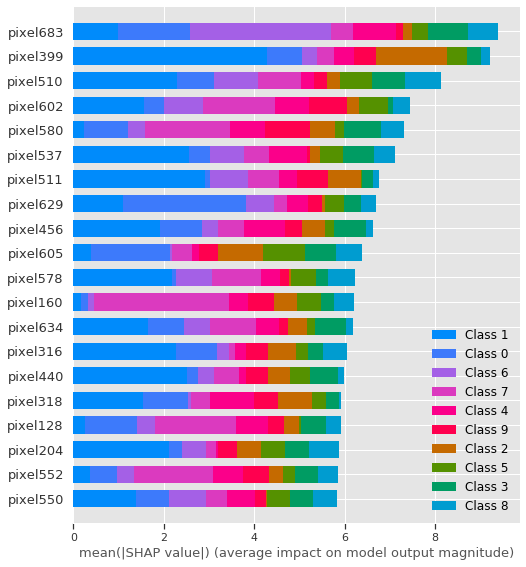

CPU times: user 1.12 s, sys: 76.1 ms, total: 1.2 s
Wall time: 940 ms


In [25]:
%%time
explainer_lr = shap.LinearExplainer(model_lr, sample)
shap_values_linear = explainer_lr.shap_values(sample)
shap.summary_plot(shap_values_linear, sample, plot_type="bar")

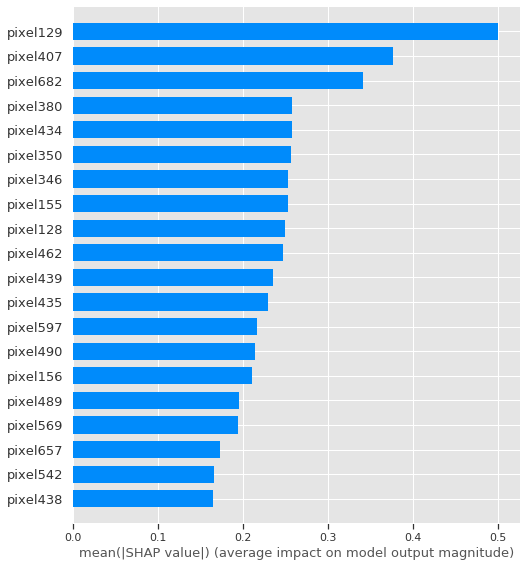

CPU times: user 7.33 s, sys: 201 ms, total: 7.53 s
Wall time: 7.3 s


In [26]:
%%time
explainer_lgb = shap.TreeExplainer(model_lgb, sample)
shap_values_lgb = explainer_lgb.shap_values(sample)
shap.summary_plot(shap_values_lgb, sample, plot_type="bar")

Percebam que é como se os modelos olhassem para `features`, ou pixels específicos para classificar. No caso da regressão logística, classes diferentes tem pesos diferentes dependendo da classe. É como se dependendo da classe, o modelo olhasse para coisas diferentes. A rede neural funciona mais ou menos assim, então vamos entender como podemos ir de um para o outro :)

# Da Regressão Logística para o Perceptron

Primeiro, vale a gente dar uma relembrada no que é a equação da reta, que uma Regressão **Linear** tenta aprender

![title](../imgs/equation-line.png)

Quando encontramos a reta no caso da regressão linear, podemos aplicar um mapeamento nessa função para trabalhar com problemas de classificação e disso sai a regressão **logística** :)

![title](../imgs/logistic_function.png)

Em que $z=mx+c$. Ou seja, usamos uma função que pega o nosso resultado linear e transforma ele em um número que vai de **0 a 1**. Essa função é conhecida como logística, mas existem várias outras que dão esse formato de *S*. Também é comum chamarmos esse tipo de função de sigmoid

# O perceptron

O perceptron é a unidade mais simples de rede neural que existe e lembra bastante o que vimos até agora :)

![title](../imgs/perceptron.png)

*Quando combinamos mais de um perceptron, temos o que a gente chama de Feed Foward Neural Network, ou Dense Network :)*

# De mãos ao código

## Keras vs Tensorflow vs Pytorch

Quando a gente fala do mundo de Deep Learning é muito comum ouvirmos esses três nomes. O Keras é uma lib que foi feita por um único engenheiro do Google, o François Chollet e é mantida por ele e um grupo pequeno de pessoas, se eu não me engano. A grande sacada é que o Tensorflow, lib de Deep Learning do Google, quando foi lançado, era muito difícil de usar e o Keras surgiu como uma API de alto nível para desenvolvedores que queriam prototipar de maneira rápida. Vamos usar ela aqui, hoje, justamente por isso.

O Pytorch surgiu através do Facebook e a ideia dela é ser tão costumizável quanto o Tensorflow, permitindo inovações de P&D e indo mais baixo nível só que com uma API muuuuito melhor**

** Dizem que o Tensorflow 2 foi uma cópia do Pytorch. No 5A optamos pelo Pytorch comomo lib de desenvolvimento para DL. Na prática, recomendo o Keras para começar, mas depois migrarem para o Pytorch

## O Keras

Com o Keras, nós criamos um modelo Sequencial e adicionamos camadas até que estamos satisfeitos com a **arquitetura** do modelo. A gente só precisa garantir que a entrada da rede bata com o número de `features` que a gente tem 

In [58]:
import keras
model = keras.models.Sequential()
model.add(keras.layers.core.Dense(16,input_dim=784,activation='sigmoid'))
model.add(keras.layers.core.Dense(16, activation='sigmoid'))
model.add(keras.layers.core.Dense(10, activation='softmax'))

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“

### Compile

In [59]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_17 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_18 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________
None


In [86]:
784*16+16

12560

In [87]:
16*16+16

272

In [91]:
16*10+10

170

### Fit

We have defined our model and compiled it ready for efficient computation.

Now it is time to execute the model on some data.

We can train or fit our model on our loaded data by calling the fit() function on the model.

Training occurs over epochs and each epoch is split into batches.

- Epoch: One pass through all of the rows in the training dataset.
- Batch: One or more samples considered by the model within an epoch before weights are updated.

In [60]:
model.fit(X_train.values, 
          keras.utils.np_utils.to_categorical(y_train, num_classes=10),
          epochs=200, batch_size=500)

Epoch 1/200
33600/33600 [==============================] - 1s 33us/step - loss: 2.2102 - acc: 0.2130
Epoch 2/200
33600/33600 [==============================] - 1s 27us/step - loss: 1.9343 - acc: 0.5170
Epoch 3/200
33600/33600 [==============================] - 1s 27us/step - loss: 1.7256 - acc: 0.6726
Epoch 4/200
33600/33600 [==============================] - 1s 27us/step - loss: 1.5381 - acc: 0.7387
Epoch 5/200
33600/33600 [==============================] - 1s 27us/step - loss: 1.3734 - acc: 0.7654
Epoch 6/200
33600/33600 [==============================] - 1s 27us/step - loss: 1.2215 - acc: 0.7901
Epoch 7/200
33600/33600 [==============================] - 1s 26us/step - loss: 1.0907 - acc: 0.8122
Epoch 8/200
33600/33600 [==============================] - 1s 27us/step - loss: 0.9821 - acc: 0.8256
Epoch 9/200
33600/33600 [==============================] - 1s 27us/step - loss: 0.8814 - acc: 0.8407
Epoch 10/200
33600/33600 [==============================] - 1s 27us/step - loss: 0.7946 - a

33600/33600 [==============================] - 1s 28us/step - loss: 0.2607 - acc: 0.9218
Epoch 82/200
33600/33600 [==============================] - 1s 28us/step - loss: 0.2576 - acc: 0.9247
Epoch 83/200
33600/33600 [==============================] - 1s 28us/step - loss: 0.2454 - acc: 0.9292
Epoch 84/200
33600/33600 [==============================] - 1s 28us/step - loss: 0.2455 - acc: 0.9290
Epoch 85/200
33600/33600 [==============================] - 1s 28us/step - loss: 0.2465 - acc: 0.9278
Epoch 86/200
33600/33600 [==============================] - 1s 28us/step - loss: 0.2539 - acc: 0.9246
Epoch 87/200
33600/33600 [==============================] - 1s 30us/step - loss: 0.2576 - acc: 0.9236
Epoch 88/200
33600/33600 [==============================] - 1s 27us/step - loss: 0.2633 - acc: 0.9214
Epoch 89/200
33600/33600 [==============================] - 1s 30us/step - loss: 0.2555 - acc: 0.9253
Epoch 90/200
33600/33600 [==============================] - 1s 30us/step - loss: 0.2534 - acc: 

33600/33600 [==============================] - 1s 32us/step - loss: 0.2071 - acc: 0.9390
Epoch 161/200
33600/33600 [==============================] - 1s 32us/step - loss: 0.2147 - acc: 0.9371
Epoch 162/200
33600/33600 [==============================] - 1s 31us/step - loss: 0.2092 - acc: 0.9369
Epoch 163/200
33600/33600 [==============================] - 1s 30us/step - loss: 0.2077 - acc: 0.9385
Epoch 164/200
33600/33600 [==============================] - 1s 33us/step - loss: 0.2004 - acc: 0.9400
Epoch 165/200
33600/33600 [==============================] - 1s 32us/step - loss: 0.1971 - acc: 0.9407
Epoch 166/200
33600/33600 [==============================] - 1s 31us/step - loss: 0.2109 - acc: 0.9359
Epoch 167/200
33600/33600 [==============================] - 1s 33us/step - loss: 0.2119 - acc: 0.9344
Epoch 168/200
33600/33600 [==============================] - 1s 33us/step - loss: 0.2132 - acc: 0.9353
Epoch 169/200
33600/33600 [==============================] - 1s 31us/step - loss: 0.208

### Avaliando o Modelo

In [62]:
_, accuracy = model.evaluate(X_val.values, keras.utils.np_utils.to_categorical(y_val, num_classes=10))
print('Accuracy: %.2f' % (accuracy*100))

8400/8400 [==============================] - 0s 38us/step
Accuracy: 92.30


In [71]:
from sklearn.metrics import confusion_matrix

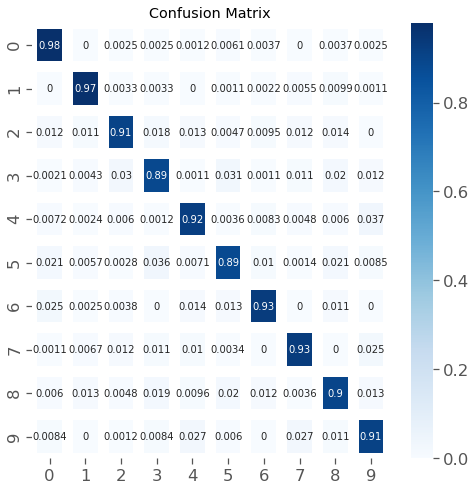

In [82]:
conf_matrix = confusion_matrix(y_val, np.argmax(model.predict(X_val.values), axis=1), normalize='true')
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names,
                                  columns=class_names)
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Confusion Matrix')
sns.heatmap(conf_matrix_df, annot=True, linewidths=10,
            cmap='Blues', ax=ax)

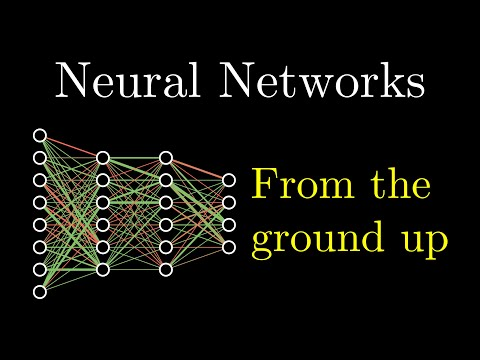

In [92]:
YouTubeVideo("aircAruvnKk", start=334, end=760)

# Break

<img src="https://media.giphy.com/media/YucHVxk7WYIc8/giphy.gif" width="300">

# Mas dá pra melhorar?


Vimos que o resultado foi pior que o do lgbm, mas melhor que o da regressão logística e isso tem muito a ver com a arquitetura que a gente escolheu. O que tá acontecendo por trás desses dados?


## Exercício

Dêem uma brincada, tentem alterar o número de neurônios da rede, aumentar o número de camadas internas, o número de batch e épocas. Vocês conseguem ter um resultado melhor?

# Fuções de Ativação

Fuções de ativações não é só a sigmoid, mas existem várias funções. **A ideia é mapear uma função linear em algum range de valores**

![title](../imgs/activation-function.png)

## Arquiteturas

A grande magia por trás de Deep Learning é que uma vez entendido o funcionamento básico de uma Rede Neural e as ideias por trás, outras operações matemáticas foram introduzidas, permitindo a criação de outros tipos de arquiteturas.

![title](../imgs/neural-networks.png)

Eu irei colocar material pra quem quiser saber um pouco mais sobre elas no pós aulas, mas vamos olhar um tipo de arquitetura muito específica na aula de hoje, que são as redes convolucionais, que ficaram famosas por conseguirem se dar muito bem com imagens (:

# As redes convolucionais


Quando montamos a nossa rede Densa, nós estávamos olhando pixel por pixel, mas será que não conseguimos olhar a rede de um ponto de vista mais dinâmico, como se passassemos uma janela e ela aprendesse o formato dessa janela? Disso que surgiram as redes convolucionais, que são inspiradas no conceito de convolução que vem lá da matemática

[Uma introducao a convolucao](https://elo7.dev/convolucao/)

Passando esse "janelamento", eu consigo olhar, além da dimensão da imagem, a cor dela com mais detalhe!

![title](../imgs/convolution.jpeg)

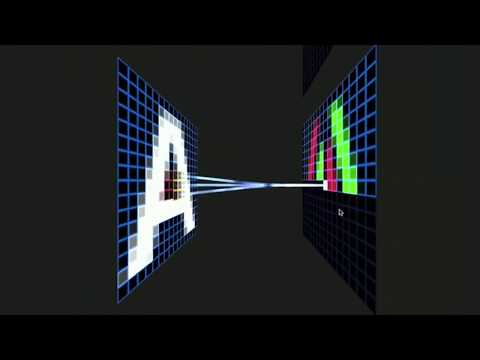

In [93]:
YouTubeVideo("f0t-OCG79-U")

**Aqui, cada janela numa mesma linha é um neurônio**

## E no nosso caso?

Podemos levar a imagem pro formato original dela, agora, ao invés de um grante vetor, é uma imagem 28x28x1 (com uma cor só)

In [104]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [105]:
X_train_img = X_train.values.reshape(-1,28,28,1)
X_val_img = X_val.values.reshape(-1,28,28,1)

In [106]:
model = keras.models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [107]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [108]:
%%time
model.fit(X_train_img, 
          keras.utils.np_utils.to_categorical(y_train, num_classes=10),
          epochs=5, batch_size=100)

Epoch 1/50
33600/33600 [==============================] - 168s 5ms/step - loss: 0.9670 - acc: 0.8346
Epoch 2/50
33600/33600 [==============================] - 164s 5ms/step - loss: 0.1197 - acc: 0.9638
Epoch 3/50
33600/33600 [==============================] - 152s 5ms/step - loss: 0.0932 - acc: 0.9721
Epoch 4/50
33600/33600 [==============================] - 179s 5ms/step - loss: 0.0777 - acc: 0.9769
Epoch 5/50
33600/33600 [==============================] - 172s 5ms/step - loss: 0.0654 - acc: 0.9808
Epoch 6/50
  700/33600 [..............................] - ETA: 2:51 - loss: 0.0420 - acc: 0.9886

KeyboardInterrupt: 

In [109]:
_, accuracy = model.evaluate(X_val_img, keras.utils.np_utils.to_categorical(y_val, num_classes=10))
print('Accuracy: %.2f' % (accuracy*100))

8400/8400 [==============================] - 15s 2ms/step
Accuracy: 98.86


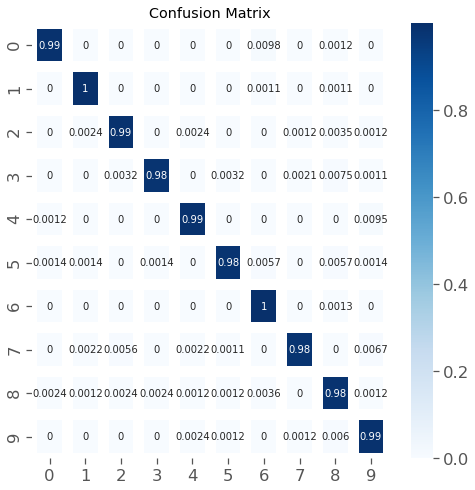

In [110]:
conf_matrix = confusion_matrix(y_val, np.argmax(model.predict(X_val_img), axis=1), normalize='true')
conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names,
                                  columns=class_names)
_, ax = plt.subplots(figsize=(8, 8))
ax.set_title('Confusion Matrix')
sns.heatmap(conf_matrix_df, annot=True, linewidths=10,
            cmap='Blues', ax=ax)

# E no caso da Regressão?

Ora, se a gente sempre usava uma função de ativação para "transformar" um número real num intervalo, a gente pode só remover esse cara e, ou seja, não usar **nenhuma** função de ativação :)

## Exercício

Criem uma Rede Neural com 3 camadas Densas em que na ultima camada a função de ativação é nenhuma (ou seja, None) e execute as linhas de baixo no dataset dado. Já fiz um EDA rápido para vocês :)

In [138]:
california_housing_dataframe = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

In [139]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [140]:
#Taken from here: https://colab.research.google.com/notebooks/mlcc/intro_to_neural_nets.ipynb?hl=en
def preprocess_features(california_housing_dataframe):
    """Prepares input features from California housing data set.

    Args:
        california_housing_dataframe: A Pandas DataFrame expected to contain data
          from the California housing data set.
    Returns:
        A DataFrame that contains the features to be used for the model, including
        synthetic features.
  """
    selected_features = california_housing_dataframe[
        ["latitude",
         "longitude",
         "housing_median_age",
         "total_rooms",
         "total_bedrooms",
         "population",
         "households",
         "median_income"]]
    processed_features = selected_features.copy()
  # Create a synthetic feature.
    processed_features["rooms_per_person"] = (
        california_housing_dataframe["total_rooms"] /
        california_housing_dataframe["population"])
    return processed_features

def preprocess_targets(california_housing_dataframe):
    """Prepares target features (i.e., labels) from California housing data set.

    Args:
    california_housing_dataframe: A Pandas DataFrame expected to contain data
      from the California housing data set.
    Returns:
        A DataFrame that contains the target feature.
    """
    output_targets = pd.DataFrame()
  # Scale the target to be in units of thousands of dollars.
    output_targets["median_house_value"] = (
        california_housing_dataframe["median_house_value"] / 1000.0)
    return output_targets

In [157]:
# Choose the first 12000 (out of 17000) examples for training.
training_examples = preprocess_features(california_housing_dataframe.head(12000))
training_targets = preprocess_targets(california_housing_dataframe.head(12000))

# Choose the last 5000 (out of 17000) examples for validation.
validation_examples = preprocess_features(california_housing_dataframe.tail(5000))
validation_targets = preprocess_targets(california_housing_dataframe.tail(5000))

# Double-check that we've done the right thing.
print("Training examples summary:")
display(training_examples.describe())
print("Validation examples summary:")
display(validation_examples.describe())

print("Training targets summary:")
display(training_targets.describe())
print("Validation targets summary:")
display(validation_targets.describe())

Training examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.00000,12000.000000,12000.000000
mean,34.614578,-118.470274,27.468333,2655.682333,547.057167,1476.007000,505.38425,3.795047,1.940185
std,1.625970,1.243589,12.061790,2258.147574,434.314754,1174.280904,391.71534,1.851925,1.327142
min,32.540000,-121.390000,1.000000,2.000000,2.000000,3.000000,2.00000,0.499900,0.018065
25%,33.820000,-118.940000,17.000000,1451.750000,299.000000,815.000000,283.00000,2.517200,1.420007
50%,34.050000,-118.210000,28.000000,2113.500000,438.000000,1207.000000,411.00000,3.462250,1.880875
75%,34.440000,-117.790000,36.000000,3146.000000,653.000000,1777.000000,606.00000,4.644625,2.258830
max,41.820000,-114.310000,52.000000,37937.000000,5471.000000,35682.000000,5189.00000,15.000100,55.222222


Validation examples summary:


,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_person
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,38.050778,-122.182510,31.27980,2614.821400,521.059600,1318.13460,491.232400,4.096053,2.078781
std,0.923030,0.480337,13.38939,1979.620397,388.452096,1073.74575,366.523912,2.021218,0.638113
min,36.140000,-124.350000,1.00000,8.000000,1.000000,8.00000,1.000000,0.499900,0.135721
25%,37.490000,-122.400000,20.00000,1481.000000,292.000000,731.00000,278.000000,2.690900,1.749190
50%,37.790000,-122.140000,31.00000,2164.000000,424.000000,1074.00000,403.000000,3.728450,2.066278
75%,38.370000,-121.910000,42.00000,3161.250000,635.000000,1590.25000,603.000000,5.064100,2.375372
max,41.950000,-121.390000,52.00000,32627.000000,6445.000000,28566.00000,6082.000000,15.000100,18.255319


Training targets summary:


,median_house_value
count,12000.000000
mean,198.037593
std,111.857499
min,14.999000
25%,117.100000
50%,170.500000
75%,244.400000
max,500.001000


Validation targets summary:


,median_house_value
count,5000.000000
mean,229.532879
std,122.520063
min,14.999000
25%,130.400000
50%,213.000000
75%,303.150000
max,500.001000


Precisamos sempre normalizar nossos dados quando estamos lidando com redes neurais! Não fizemos isso antes porquê os dados já estavam ok :)

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
standard_scaled_features = StandardScaler()
standard_scaled_target = StandardScaler()

In [160]:
training_examples = standard_scaled_features.fit_transform(training_examples)
validation_examples = standard_scaled_features.transform(validation_examples)

In [161]:
training_targets = standard_scaled_target.fit_transform(training_targets)

# TIRAR

In [149]:
model = keras.models.Sequential()
model.add(keras.layers.core.Dense(10,input_dim=9,activation='relu'))
model.add(keras.layers.core.Dense(2, activation='relu'))
model.add(keras.layers.core.Dense(1, activation=None))

In [150]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 22        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 3         
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________
None


In [151]:
%%time
model.fit(training_examples, 
          training_targets,
          epochs=500, batch_size=200)

Epoch 1/500
12000/12000 [==============================] - 0s 41us/step - loss: 0.8629 - mean_squared_error: 0.8629
Epoch 2/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.6972 - mean_squared_error: 0.6972
Epoch 3/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.6017 - mean_squared_error: 0.6017
Epoch 4/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.5260 - mean_squared_error: 0.5260
Epoch 5/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.4578 - mean_squared_error: 0.4578
Epoch 6/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.3977 - mean_squared_error: 0.3977
Epoch 7/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.3638 - mean_squared_error: 0.3638
Epoch 8/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.3436 - mean_squared_error: 0.3436
Epoch 9/500
12000/12000 [==============================] - 0s 8us/step - loss: 

12000/12000 [==============================] - 0s 8us/step - loss: 0.2438 - mean_squared_error: 0.2438
Epoch 72/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2439 - mean_squared_error: 0.2439
Epoch 73/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2436 - mean_squared_error: 0.2436
Epoch 74/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2433 - mean_squared_error: 0.2433
Epoch 75/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2429 - mean_squared_error: 0.2429
Epoch 76/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2434 - mean_squared_error: 0.2434
Epoch 77/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2428 - mean_squared_error: 0.2428
Epoch 78/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2426 - mean_squared_error: 0.2426
Epoch 79/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.242

12000/12000 [==============================] - 0s 15us/step - loss: 0.2356 - mean_squared_error: 0.2356
Epoch 142/500
12000/12000 [==============================] - 0s 11us/step - loss: 0.2355 - mean_squared_error: 0.2355
Epoch 143/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2359 - mean_squared_error: 0.2359
Epoch 144/500
12000/12000 [==============================] - 0s 11us/step - loss: 0.2360 - mean_squared_error: 0.2360
Epoch 145/500
12000/12000 [==============================] - 0s 10us/step - loss: 0.2351 - mean_squared_error: 0.2351
Epoch 146/500
12000/12000 [==============================] - 0s 10us/step - loss: 0.2358 - mean_squared_error: 0.2358
Epoch 147/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2355 - mean_squared_error: 0.2355
Epoch 148/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2354 - mean_squared_error: 0.2354
Epoch 149/500
12000/12000 [==============================] - 0s 9us/step 

Epoch 211/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2326 - mean_squared_error: 0.2326
Epoch 212/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2330 - mean_squared_error: 0.2330
Epoch 213/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2324 - mean_squared_error: 0.2324
Epoch 214/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2325 - mean_squared_error: 0.2325
Epoch 215/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2324 - mean_squared_error: 0.2324
Epoch 216/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2326 - mean_squared_error: 0.2326
Epoch 217/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2335 - mean_squared_error: 0.2335
Epoch 218/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2325 - mean_squared_error: 0.2325
Epoch 219/500
12000/12000 [==============================] - 0s 

12000/12000 [==============================] - 0s 8us/step - loss: 0.2306 - mean_squared_error: 0.2306
Epoch 281/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2312 - mean_squared_error: 0.2312
Epoch 282/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2311 - mean_squared_error: 0.2311
Epoch 283/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2315 - mean_squared_error: 0.2315
Epoch 284/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2313 - mean_squared_error: 0.2313
Epoch 285/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2314 - mean_squared_error: 0.2314
Epoch 286/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2310 - mean_squared_error: 0.2310
Epoch 287/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2311 - mean_squared_error: 0.2311
Epoch 288/500
12000/12000 [==============================] - 0s 8us/step - los

12000/12000 [==============================] - 0s 8us/step - loss: 0.2293 - mean_squared_error: 0.2293
Epoch 351/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2295 - mean_squared_error: 0.2295
Epoch 352/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2298 - mean_squared_error: 0.2298
Epoch 353/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2296 - mean_squared_error: 0.2296
Epoch 354/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2293 - mean_squared_error: 0.2293
Epoch 355/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2294 - mean_squared_error: 0.2294
Epoch 356/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2298 - mean_squared_error: 0.2298
Epoch 357/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2297 - mean_squared_error: 0.2297
Epoch 358/500
12000/12000 [==============================] - 0s 8us/step - los

12000/12000 [==============================] - 0s 8us/step - loss: 0.2282 - mean_squared_error: 0.2282
Epoch 421/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 422/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 423/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2278 - mean_squared_error: 0.2278
Epoch 424/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2275 - mean_squared_error: 0.2275
Epoch 425/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2277 - mean_squared_error: 0.2277
Epoch 426/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2279 - mean_squared_error: 0.2279
Epoch 427/500
12000/12000 [==============================] - 0s 7us/step - loss: 0.2276 - mean_squared_error: 0.2276
Epoch 428/500
12000/12000 [==============================] - 0s 8us/step - los

12000/12000 [==============================] - 0s 8us/step - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 491/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 492/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2272 - mean_squared_error: 0.2272
Epoch 493/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2270 - mean_squared_error: 0.2270
Epoch 494/500
12000/12000 [==============================] - 0s 10us/step - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 495/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2274 - mean_squared_error: 0.2274
Epoch 496/500
12000/12000 [==============================] - 0s 9us/step - loss: 0.2267 - mean_squared_error: 0.2267
Epoch 497/500
12000/12000 [==============================] - 0s 8us/step - loss: 0.2273 - mean_squared_error: 0.2273
Epoch 498/500
12000/12000 [==============================] - 0s 9us/step - lo

In [155]:
pred = standard_scaled_target.inverse_transform(model.predict(validation_examples))

In [156]:
from sklearn.metrics import mean_absolute_error

In [166]:
pred

array([[139.58124],
       [121.99345],
       [130.41309],
       ...,
       [189.00133],
       [168.58502],
       [187.451  ]], dtype=float32)

In [169]:
validation_targets = validation_targets.assign(prediction=pred)

In [173]:
validation_targets = validation_targets.assign(
    error=validation_targets['median_house_value']-validation_targets['prediction'])

In [174]:
validation_targets.head()

,median_house_value,prediction,error
12000,126.2,139.581238,-13.381238
12001,154.3,121.993446,32.306554
12002,92.0,130.413086,-38.413086
12003,237.6,215.947159,21.652841
12004,146.9,226.496597,-79.596597


In [178]:
np.sqrt(np.abs(validation_targets['error']).mean())

8.766403790733477

In [164]:
np.sqrt(mean_absolute_error(validation_targets,pred))

8.766403790733477

A unidade quer dizer que erramos o valor da casa em torno de **8.7 mil dólares**. Considerando que é um preço de venda, isso pode ser até aceitável :)



Legal, né? :)

# You did it ! 

<img src="https://media.giphy.com/media/yoJC2GnSClbPOkV0eA/giphy.gif" width="300">

Contudo **Lembrem-se que na aula de hoje a gente não focou como que a rede aprende, porquê isso propriamente dito vale sozinho, uma aula de 02 horas e ficaria muito puxado** 

Coloquei no pós aula **muito** material pra quem quiser estudar!